<a href="https://colab.research.google.com/github/ixd-ai-hub/Research-Ground/blob/project%2FCU-865d7myr5-shelf-object-detection/model/NMSFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import numpy as np

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to use CUDA GPU
    device = torch.device("cuda")
    print("CUDA is available. Using GPU:", torch.cuda.get_device_name(device))
else:
    print("CUDA is not available. Using CPU.")

CUDA is not available. Using CPU.


In [ ]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
m

In [ ]:
import pandas as pd
proposal = pd.read_csv("shell2_full_labels.txt", delimiter=" ", index_col=False,names=['x_min', 'y_min', 'x_max', 'y_max', 'conf'])
proposal['active'] = True
output = pd.DataFrame(columns=['x_min', 'y_min', 'x_max', 'y_max', 'conf','active'])
print(proposal)
proposal_copy = proposal.copy()

while not proposal.loc[proposal['active'] == True].empty:
    max_index = proposal.loc[proposal['active'] == True, 'conf'].idxmax()
    max_conf_proposal = proposal.loc[max_index]
    proposal.loc[max_index, 'active'] = False
    series_df = pd.DataFrame(max_conf_proposal[['x_min', 'y_min', 'x_max', 'y_max','conf' ,'active']]).T
    output = pd.concat([output, series_df])

    for i, p in proposal.iterrows():
        if p['active'] == False:
            continue
        iou = bb_intersection_over_union(list(max_conf_proposal[['x_min', 'y_min', 'x_max', 'y_max']]),
                                         list(p[['x_min', 'y_min', 'x_max', 'y_max']]))
        if iou > 0.1:
            proposal.loc[i, 'active'] = False


     x_min  y_min  x_max  y_max      conf  active
0      843     11   1279    563  0.994542    True
1      664      0   1279    563  0.988003    True
2      663    541   1279    718  0.987418    True
3      183      0    264     96  0.990210    True
4      258      0    331    120  0.988424    True
..     ...    ...    ...    ...       ...     ...
152    482    601    545    674  0.954762    True
153    777    269    794    300  0.977131    True
154    456    664    508    719  0.972534    True
155    383    434    453    579  0.962244    True
156    855    527    873    609  0.950000    True

[157 rows x 6 columns]


In [ ]:
output

,x_min,y_min,x_max,y_max,conf,active
105,449,25,467,35,1.0,True
61,484,0,523,32,0.995511,True
0,843,11,1279,563,0.994542,True
70,819,198,834,226,0.992063,True
12,281,628,381,719,0.991592,True
...,...,...,...,...,...,...
77,582,657,621,719,0.954185,True
143,180,511,303,606,0.953302,True
63,962,678,1212,719,0.951565,True
140,769,312,790,358,0.950479,True


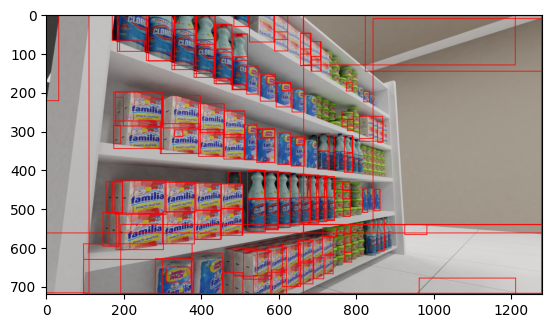

In [ ]:
img = Image.open("shell2.jpg",mode="r")
img = img.resize((1280,720))
for index,row in proposal.iterrows():
    x_min = float(row['x_min'])
    y_min = float(row['y_min'])
    x_max = float(row['x_max'])
    y_max = float(row['y_max'])
    conf = float(row['conf'])
    draw = ImageDraw.Draw(img)
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline='red',width=2)


plt.imshow(img)

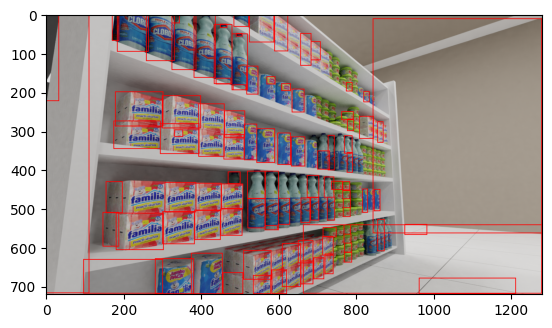

In [ ]:
img = Image.open("shell2.jpg",mode="r")
img = img.resize((1280,720))
for index,row in output.iterrows():
    x_min = float(row['x_min'])
    y_min = float(row['y_min'])
    x_max = float(row['x_max'])
    y_max = float(row['y_max'])
    conf = float(row['conf'])
    draw = ImageDraw.Draw(img)
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline='red',width=2)


plt.imshow(img)